In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Download

In [213]:
from data_querier import DataQuerierYF
from config import load_config


configuration = load_config()
data_getter = DataQuerierYF(configuration)

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


# Equally weighted

Unnamed: 0     ^GSPC        GE       IBM       DIS        BA       CAT  \
0               0       NaN       NaN       NaN       NaN       NaN       NaN   
1               1  0.011340       NaN       NaN       NaN       NaN       NaN   
2               2  0.004737       NaN       NaN       NaN       NaN       NaN   
3               3  0.002949       NaN       NaN       NaN       NaN       NaN   
4               4  0.005872       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
16150       16150  0.000305 -0.005420 -0.002896  0.004063 -0.009916 -0.000207   
16151       16151 -0.011770 -0.016439 -0.012537 -0.017978 -0.020624 -0.012576   
16152       16152 -0.002826 -0.009118 -0.009232  0.001750  0.009959 -0.002304   
16153       16153  0.009568  0.012663  0.019565  0.016351  0.018590  0.002931   
16154       16154  0.007194  0.008614  0.005367  0.007345 -0.011064  0.007705   

             AA       HPQ        DD  ...       NSM  CLP       CTX       CTR  \
0           NaN       NaN       NaN  ...       NaN  NaN       NaN       NaN   
1           NaN       NaN       NaN  ...       NaN  NaN       NaN       NaN   
2           NaN       NaN       NaN  ...       NaN  NaN       NaN       NaN   
3           NaN       NaN       NaN  ...       NaN  NaN       NaN       NaN   
4           NaN       NaN       NaN  ...       NaN  NaN       NaN       NaN   
...         ...       ...       ...  ...       ...  ...       ...       ...   
16150 -0.001642 -0.010756  0.006343  ...  0.042972  NaN  0.001974 -0.001879   
16151 -0.025803 -0.023249 -0.010898  ... -0.011131  NaN  0.007076 -0.006604   
16152 -0.001688  0.005519  0.000913  ...  0.047769  NaN  0.007026  0.003307   
16153  0.005055  0.014005  0.009232  ... -0.017531  NaN  0.003882  0.007987   
16154  0.008368  0.035980  0.006307  ...  0.046083  NaN  0.006565  0.006065   

            DYN       AIB       KIM       SFN       TCO         S  
0           NaN       NaN       NaN       NaN       NaN       NaN  
1           NaN       NaN       NaN       NaN       NaN       NaN  
2           NaN       NaN       NaN       NaN       NaN       NaN  
3           NaN       NaN       NaN       NaN       NaN       NaN  
4           NaN       NaN       NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...       ...       ...  
16150  0.011547  0.003892  0.002334  0.011191  0.009188  0.000000  
16151 -0.008647 -0.001296  0.001863  0.001534 -0.000436 -0.018391  
16152  0.008237  0.003020  0.001395  0.005350 -0.015368  0.018391  
16153  0.002458  0.025942  0.000465  0.009860  0.000442 -0.001140  
16154 -0.003689 -0.005473  0.004634 -0.004539 -0.001328 -0.010315  

[16155 rows x 1013 columns]

In [2]:
import os
import pandas as pd
files = filter(lambda x: x.endswith("parquet"), os.listdir("data"))
khra = pd.concat([pd.read_parquet(os.path.join("data", f))["Close"] for f in files], join="inner").sort_values(by="Date", axis=0)

In [ ]:
khra[]

In [4]:
from equally_weighted import EquallyWeighted
from config import load_config


configuration = load_config()
portfolio = EquallyWeighted(configuration)

Preprocessing 336
475
Preprocessing dropped the following stocksOGN-BF.B-BRK.B


<AxesSubplot: title={'center': 'Cumulative returns of the equally weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

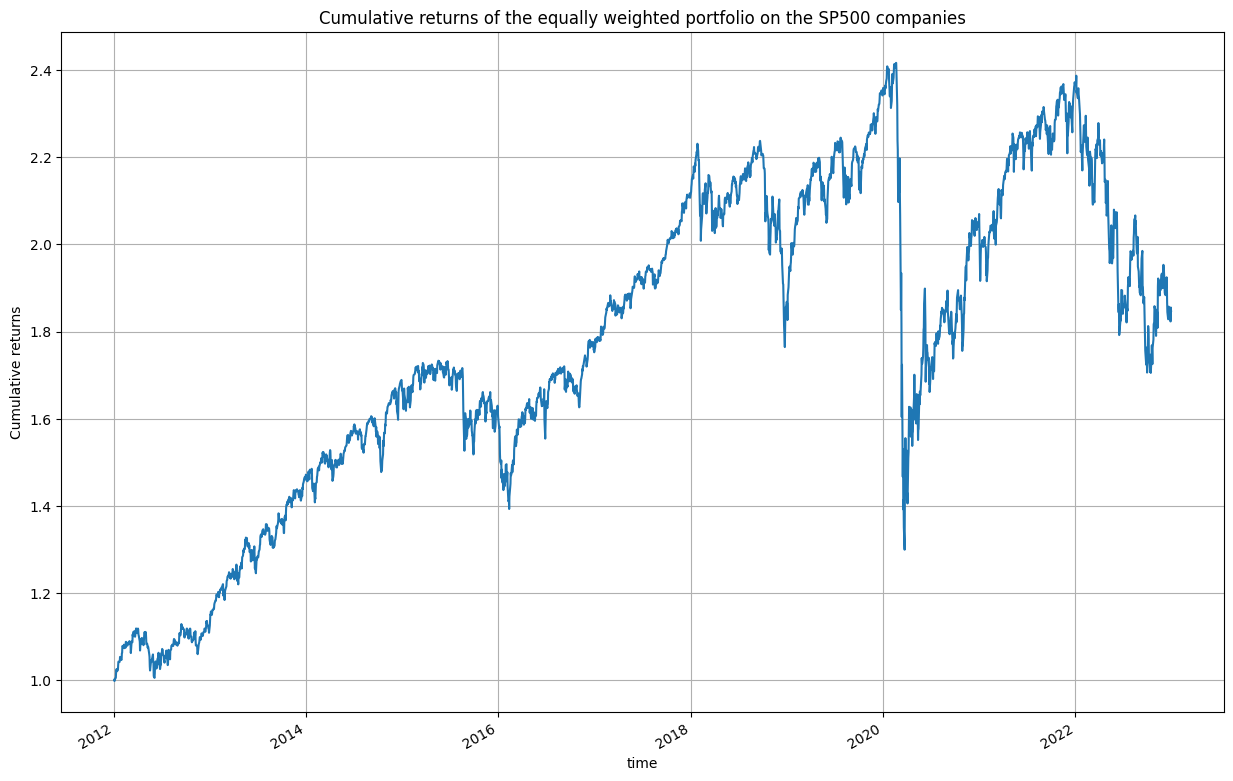

In [5]:
equal = portfolio()
equal.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the equally weighted portfolio on the SP500 companies", figsize=(15, 10)) 

# Market weights

In [4]:
from market_weights import MarketWeighted
from config import load_config

configuration = load_config()
portfolio = MarketWeighted(configuration)


Loading library list...
Done
      permco ticker
0     8045.0   ORCL
1     8048.0   MSFT
2     8087.0   TROW
3    22168.0    HON
4    20207.0    ADM
..       ...    ...
388  52978.0     PM
389  52983.0      V
390  52985.0    AWK
391  52996.0    FRC
392   7267.0    UNH

[393 rows x 2 columns]


C:\Users\user\Desktop\stock_clustering\market_weights.py:48: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  filter(lambda x: len(x[1]) > 120, # some are missing certain dates
100%|███████████████████████████████████████████████████████████████████████████████| 189/189 [00:01<00:00, 141.25it/s]


<AxesSubplot: title={'center': 'Cumulative returns of the market weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

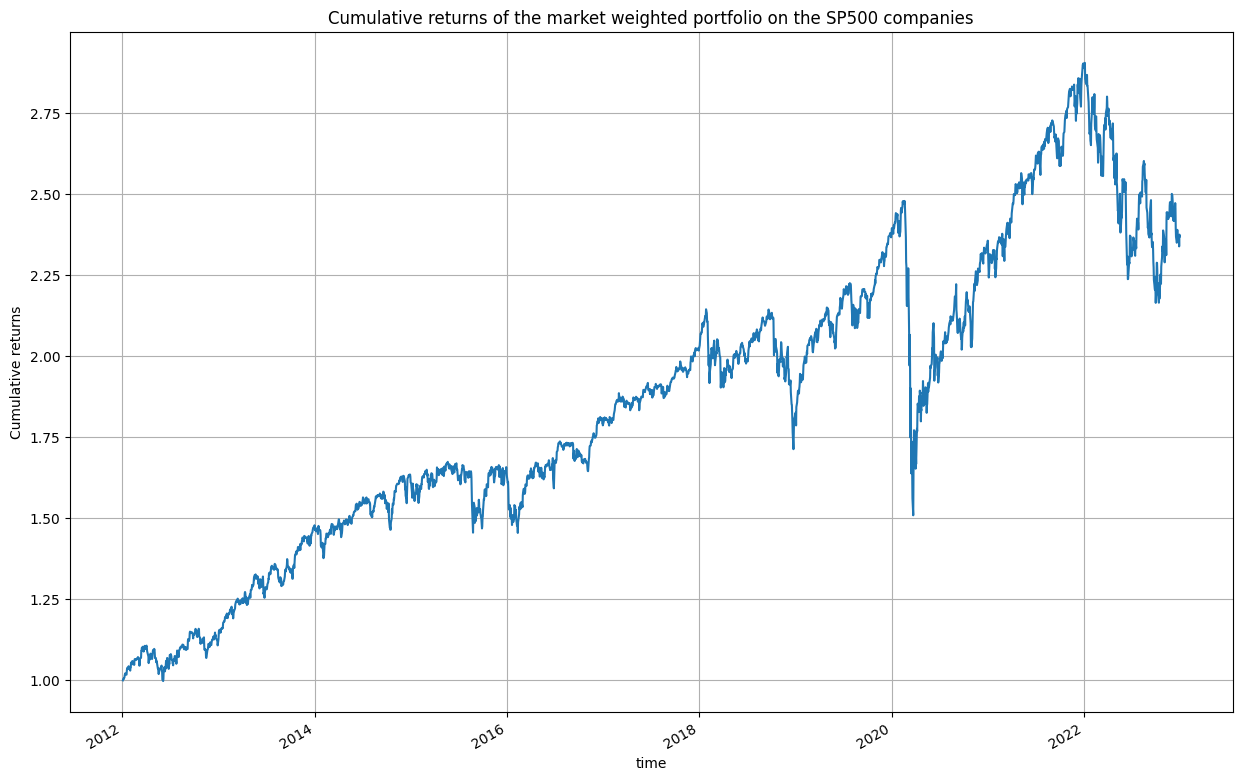

In [5]:
market = portfolio()
market.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the market weighted portfolio on the SP500 companies", figsize=(15, 10))

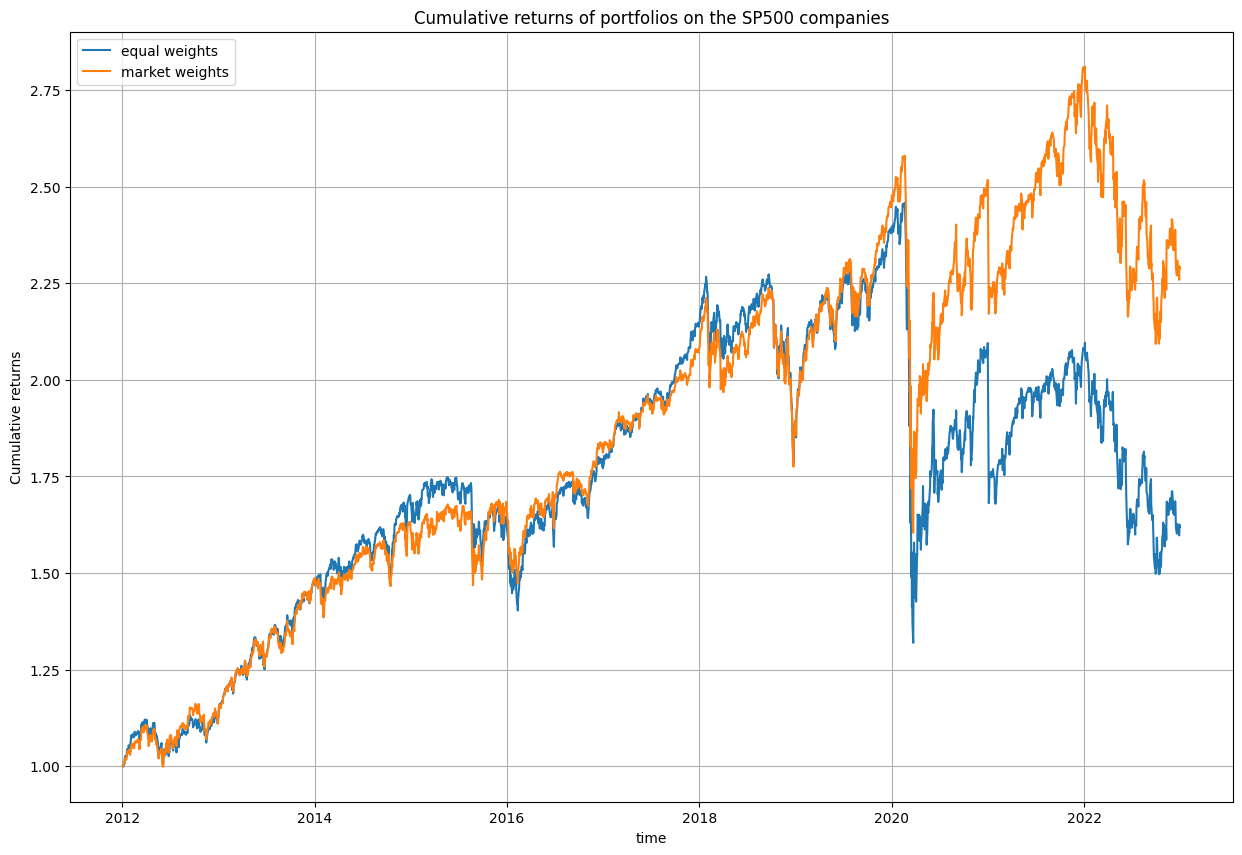

In [5]:
import matplotlib.pyplot as plt 


plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(equal, label="equal weights")
plt.plot(market, label="market weights")
#plt.plot(a_, label="markowitz portfolio")
#aversions["equal weights"] = equal
#aversions["market weights"] = market
#aversions[["risk aversion 2.0", "market weights", "equal weights"]].plot()
plt.xlabel("time")
plt.ylabel("Cumulative returns")
plt.title("Cumulative returns of portfolios on the SP500 companies")
plt.grid()
plt.legend()



# Markowitz Portfolio

Multiple Risky assets and no risk free asset:

$$ \max _w\left(w^{\prime} \mu-\frac{a}{2} w^{\prime} \Sigma w -  \frac{C}{2}w^{\prime}w\right) \quad \text { s.t. } \quad w^{\prime} \mathbf{1}=1 $$ 

We compute our Langrangian:

$$ L(\lambda)=w^{\prime} \mu-\frac{a}{2} w^{\prime} \Sigma w - \frac{C}{2}w^{\prime}w +\lambda\left(1-\mathbf{1}^{\prime} w\right)  $$

Our first order condition becomes: 

$$
\frac{\partial L}{\partial w}=\mu-a \Sigma w-\lambda \mathbf{1} - Cw=0
$$
The optimal portfolio as a function of $\lambda$ is therefore:
$$
w=(a\Sigma + CI)^{-1}(\mu-\lambda \mathbf{1})
$$

Let us define the following matrix $\beta = (a\Sigma + CI)^{-1}$, Thus $\lambda$ can simply be found using the constraint $w^{\prime} \mathbf{1}=1$:

$$
\mathbf{1}^{\prime} \beta(\mu-\lambda \mathbf{1})=1
$$
solving,
$$
\lambda=\frac{\mathbf{1}^{\prime}\beta \mu- 1}{\mathbf{1}^{\prime} \beta \mathbf{1}}
$$

Plugging everything in we get: 

$$
w=\beta(\mu- \frac{\mathbf{1}^{\prime}\beta \mu-1}{\mathbf{1}^{\prime} \beta \mathbf{1}}\mathbf{1})
$$


In [2]:
from mean_variance import Markowitz 
from config import load_config


configuration = load_config()
portfolio = Markowitz(configuration, window_size=207, risk_aversion=8, stride=5, C=0.1)


C:\Users\user\miniconda3\envs\fbd\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Preprocessing 336
481
474
(2768, 463)
Preprocessing dropped the following stocksCDAY-CARR-MRNA-OGN-OTIS-FOXA-FOX-BF.B-CTVA-BRK.B-DOW


In [ ]:
(portfolio.returns.to_numpy())*portfolio.weights.sum(axis=1)

<AxesSubplot: xlabel='Date'>

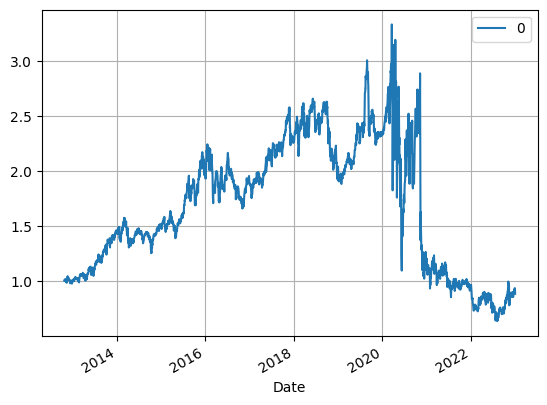

In [14]:
import pandas as pd 
pd.DataFrame((((portfolio.returns.to_numpy()[207:] + 1)*portfolio.weights[207:]).sum(axis=1)), index=portfolio.returns.index[207:]).cumprod().plot(grid=True)

In [8]:
portfolio.weights

array([[-0.01062613,  0.05919329, -0.01244174, ..., -0.00914828,
         0.01268721, -0.00712336],
       [-0.01062613,  0.05919329, -0.01244174, ..., -0.00914828,
         0.01268721, -0.00712336],
       [-0.01062613,  0.05919329, -0.01244174, ..., -0.00914828,
         0.01268721, -0.00712336],
       ...,
       [ 0.02463437, -0.02816993, -0.03056012, ..., -0.04049935,
        -0.02765847, -0.01534072],
       [ 0.02463437, -0.02816993, -0.03056012, ..., -0.04049935,
        -0.02765847, -0.01534072],
       [ 0.02463437, -0.02816993, -0.03056012, ..., -0.04049935,
        -0.02765847, -0.01534072]])

<AxesSubplot: xlabel='Date'>

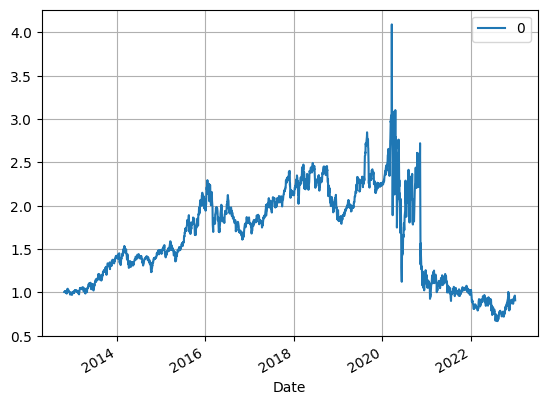

In [21]:
import pandas as pd 
pd.DataFrame((((portfolio.returns.to_numpy()[207:] + 1)*portfolio.weights[207:]).sum(axis=1)), index=portfolio.returns.index[207:]).cumprod().plot(grid=True)

In [20]:
cum_4 = portfolio.get_rolling_cumulative_return(parallel=True)

2762


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [14:30<00:00,  1.70s/it]


2768


In [13]:
import numpy as np
print(portfolio.returns.shape[0])
np.max(portfolio.weights), np.min(portfolio.weights), portfolio.weights.shape

2768


(0.23130977603808459, -0.2926202490248208, (2768, 463))

In [14]:
import numpy as np
np.max(np.max(portfolio.returns)), np.min(np.min(portfolio.returns))

C:\Users\user\miniconda3\envs\fbd\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\miniconda3\envs\fbd\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


(0.404689801525437, -1.9009276023080819)

In [15]:
"TECH" in portfolio.returns.columns

False

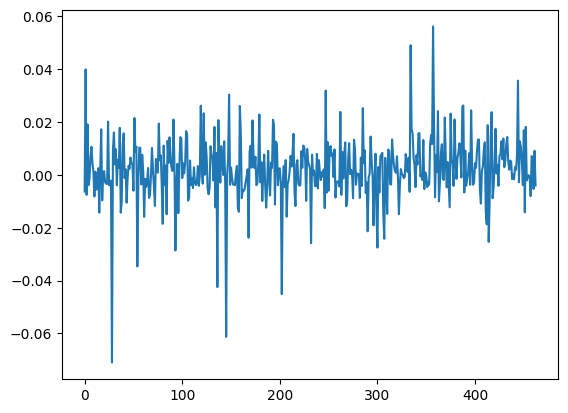

In [16]:
import matplotlib.pyplot as plt
plt.plot(portfolio.weights[0, :])

In [7]:
portfolio.returns.min(axis=0).sort_values().iloc[:15]

TSLA   -1.900928
APA    -1.167539
CPRT   -1.109407
OXY    -1.083933
MRO    -0.881543
EPAM   -0.840818
FANG   -0.806548
OKE    -0.606562
HAL    -0.603681
CZR    -0.600129
DVN    -0.597372
ENPH   -0.596567
PXD    -0.585282
WRB    -0.568495
NCLH   -0.557513
dtype: float64

<AxesSubplot: xlabel='Date'>

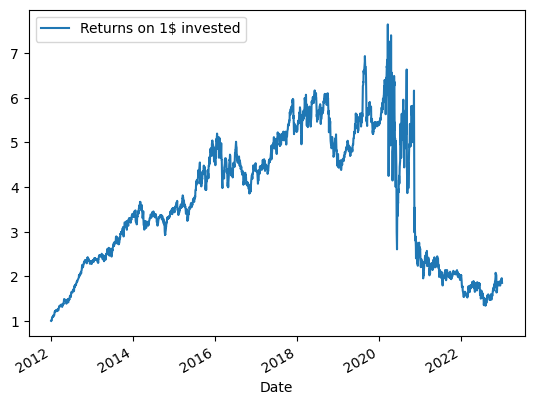

In [8]:
cum_4.rename(columns={0:"Returns on 1$ invested"}).plot()

In [14]:
from mean_variance import Markowitz 
from config import load_config


configuration = load_config()
portfolio = Markowitz(configuration, window_size=207, risk_aversion=8, stride=5, C=0.1, clustering=s)
portfolio.clustering=[[list(cluster) for cluster in ts]for ts in s]

Preprocessing 336
481
474
(2768, 463)
Preprocessing dropped the following stocksCDAY-CARR-MRNA-OGN-OTIS-FOXA-FOX-BF.B-CTVA-BRK.B-DOW


In [15]:
portfolio.clustering

[[[4],
  [128,
   2,
   134,
   8,
   10,
   140,
   15,
   16,
   146,
   147,
   20,
   21,
   22,
   150,
   151,
   26,
   27,
   155,
   31,
   159,
   35,
   36,
   165,
   38,
   39,
   168,
   41,
   44,
   172,
   46,
   175,
   47,
   179,
   181,
   183,
   185,
   187,
   188,
   59,
   62,
   69,
   199,
   200,
   205,
   207,
   209,
   214,
   215,
   216,
   91,
   92,
   93,
   96,
   99,
   102,
   105,
   106,
   107,
   111,
   116,
   117,
   118,
   123],
  [25],
  [33],
  [79],
  [82],
  [109],
  [114],
  [154],
  [176],
  [198],
  [201],
  [208],
  [220],
  [221],
  [225, 226, 231, 234, 235, 222],
  [236],
  [237],
  [261],
  [297],
  [313],
  [314],
  [323],
  [0,
   1,
   3,
   5,
   6,
   7,
   9,
   11,
   12,
   13,
   14,
   17,
   18,
   19,
   23,
   24,
   28,
   29,
   30,
   32,
   34,
   37,
   40,
   42,
   43,
   45,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   60,
   61,
   63,
   64,
   65,
   66,
   67,
   68,

In [16]:
portfolio.get_rolling_cumulative_return(parallel=False, cluster=True)

2762 <bound method Markowitz.clustered_rolling of <mean_variance.Markowitz object at 0x0000023592BF2E90>>


  0%|                                                                                          | 0/512 [00:00<?, ?it/s]

cluster


TypeError: not enough arguments: expected 3, got 2

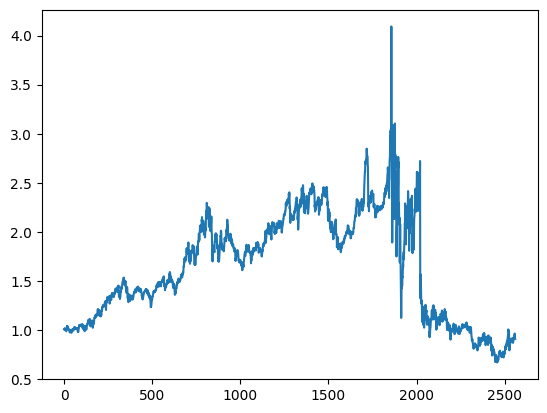

In [61]:
plt.plot(np.cumprod(((portfolio.returns.to_numpy()[207:] + 1)*portfolio.weights[207:]).sum(axis=1)))#, index=portfolio.returns.index[207:]

Text(0.5, 1.0, 'Cumulative Return of the Markowitz Portfolio with a rolling window of 365 days')

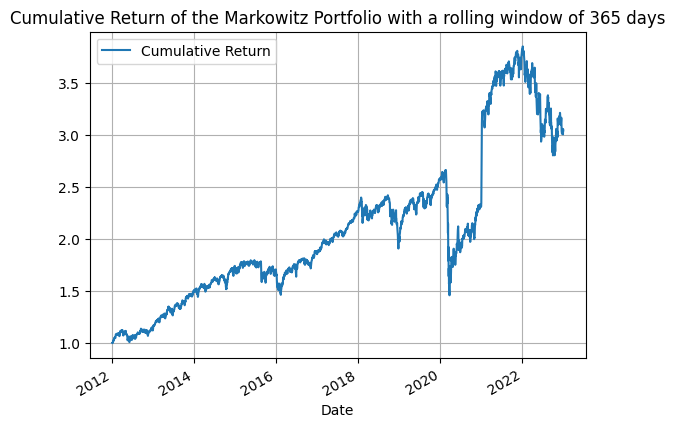

In [10]:
import matplotlib.pyplot as plt
cum.rename(columns={0:"Cumulative Return"}).plot(grid=True)
plt.title("Cumulative Return of the Markowitz Portfolio with a rolling window of 365 days")

<AxesSubplot: >

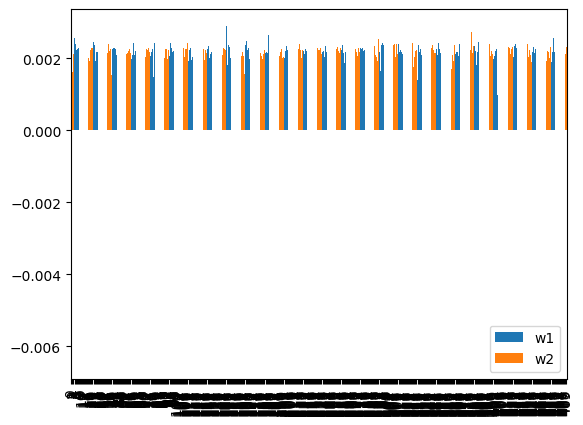

In [21]:
import pandas as pd
pd.DataFrame(portfolio.weights[2266:2268].T, columns=["w1", "w2"]).plot(kind="bar")

<AxesSubplot: xlabel='Date'>

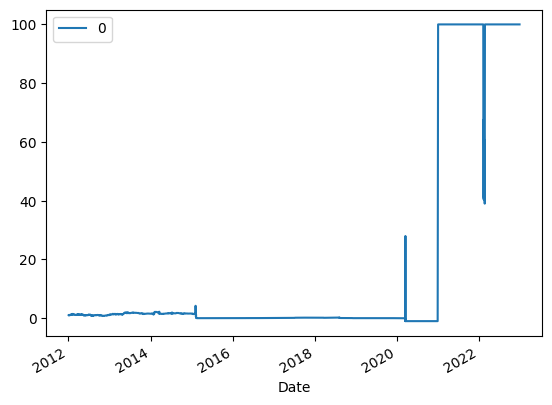

In [29]:
cum.clip(lower=-1, upper=100).plot()

In [14]:

import numpy as np
risk_aversion = 2

def optimal_weights(returns, corr): 
    inv_corr = np.linalg.inv(corr)
    ones = np.ones(returns.shape)
    lambda_constraint = ((ones.T@inv_corr@returns - risk_aversion)/(ones.T@inv_corr@ones))[0, 0]
    return (1/risk_aversion)*inv_corr@(returns - lambda_constraint*ones)
x=portfolio.data

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
print(returns.mean(axis=0).sum())
op = optimal_weights(returns.mean(axis=0).to_numpy()[:, np.newaxis], returns.cov().to_numpy())
op, op.shape, op.sum()

0.11697467009189476


(array([[-6.33029916e-01],
        [-9.15513127e-02],
        [-8.40608398e-01],
        [ 2.81608158e-01],
        [ 5.19263203e-01],
        [ 1.66976840e+00],
        [ 7.77945448e-01],
        [-2.52012786e-01],
        [ 3.60507413e-01],
        [ 2.07525446e-01],
        [ 5.94179608e-01],
        [-1.30811925e-01],
        [-1.73014469e-01],
        [-1.39037511e-01],
        [ 2.49523726e+00],
        [ 3.95434827e-03],
        [ 1.33859755e-01],
        [-4.44084012e-01],
        [-7.77443258e-01],
        [ 6.64067110e-01],
        [-3.64921097e-01],
        [-1.82204807e-01],
        [-9.55187939e-02],
        [-1.17922342e-01],
        [ 1.61606285e+00],
        [-1.07844142e+00],
        [-1.43765861e-01],
        [ 5.32761110e-01],
        [-5.02692679e-01],
        [-1.06573812e+00],
        [ 5.81321719e-02],
        [ 1.40303645e+00],
        [-7.86387302e-01],
        [ 3.14317560e-01],
        [-2.63788121e-01],
        [-1.77775206e+00],
        [ 1.04386529e+00],
 

Text(0.5, 0, 'time')

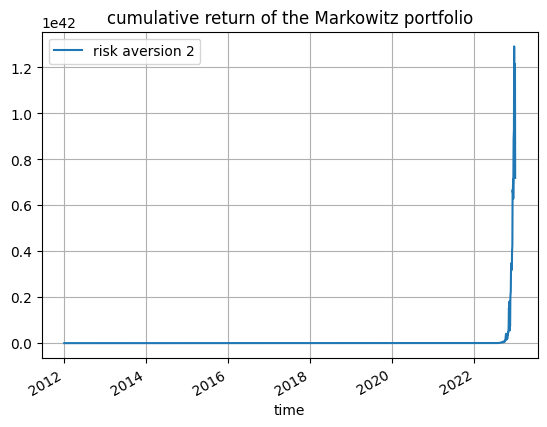

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
a_ = np.cumprod(returns.to_numpy() @ op)
a_ = pd.DataFrame(np.array(a_).reshape(-1), index=portfolio.data.index, columns=[f"risk aversion {2}"])
#l.append(a_)

pd.DataFrame(a_).plot(grid=True)
plt.title("cumulative return of the Markowitz portfolio")
plt.xlabel("time")


<AxesSubplot: ylabel='Frequency'>

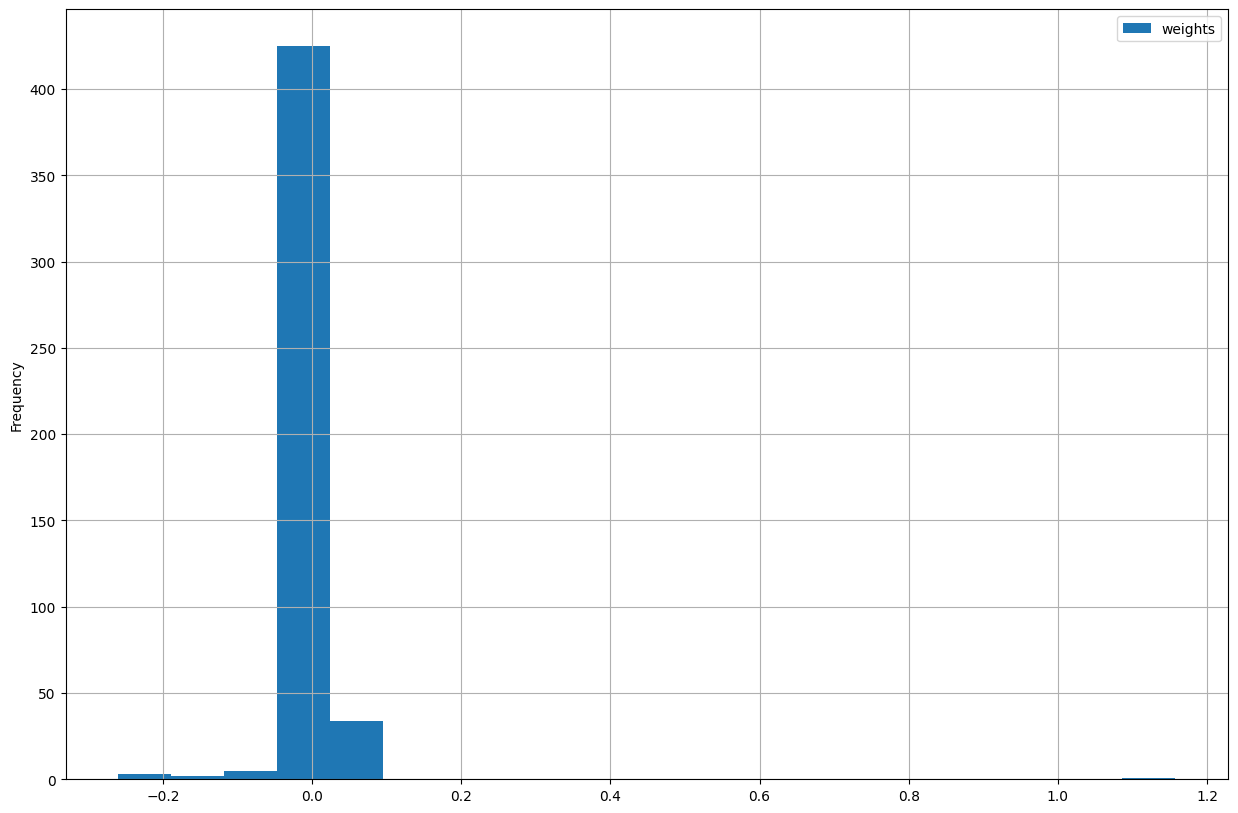

In [63]:
pd.DataFrame(op.reshape(-1, 1), columns=["weights"]).plot(kind="hist", bins=20, grid=True)

(470, 1)

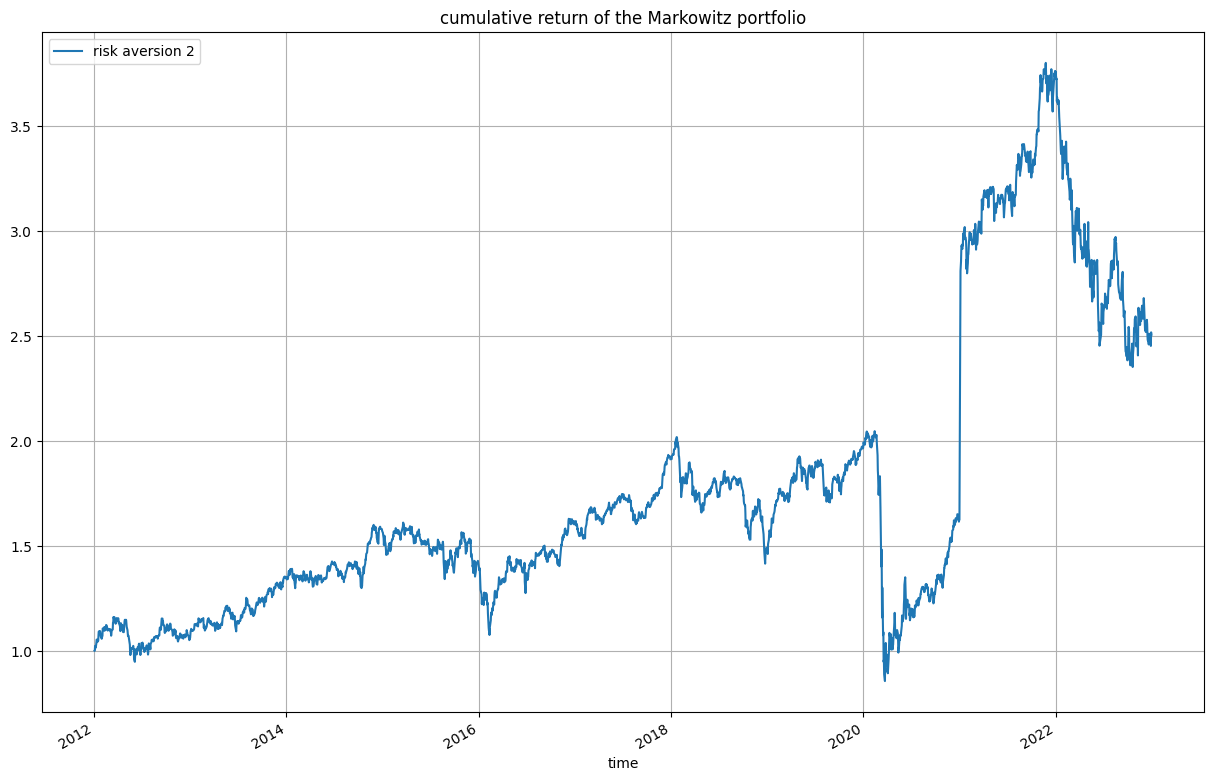

In [58]:
from utils import compute_clean_correlation_matrix
from tqdm import tqdm 
import pandas as pd

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
_returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
raw_corr, clean_corr = compute_clean_correlation_matrix(returns.fillna(method="bfill"))
l = []
#for i in tqdm(2.**np.arange(-2, 4)):
risk_aversion = 2
op = optimal_weights(returns.mean(axis=0).to_numpy()[:, np.newaxis], clean_corr)
a_ = np.cumprod((_returns.to_numpy()@op))
a_ = pd.DataFrame(np.array(a_).reshape(-1), index=portfolio.data.index, columns=[f"risk aversion {2}"])
l.append(a_)

pd.DataFrame(a_).plot(grid=True)
plt.title("cumulative return of the Markowitz portfolio")
plt.xlabel("time")

op.shape

<AxesSubplot: ylabel='Frequency'>

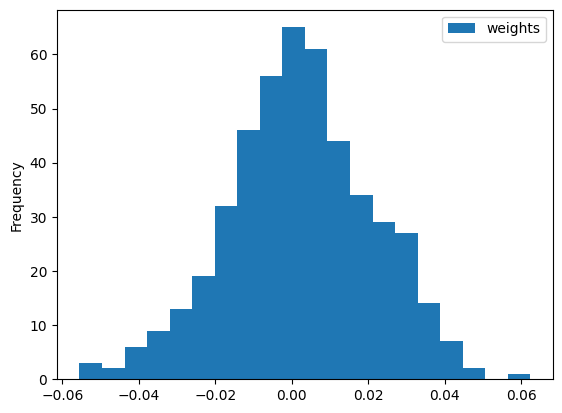

In [47]:
pd.DataFrame(op.reshape(-1, 1), columns=["weights"]).plot(kind="hist", bins=20)

In [65]:
from utils import compute_clean_correlation_matrix
from tqdm.contrib.concurrent import process_map
from tqdm import tqdm
import numpy as np

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
_returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
#raw_corr, clean_corr = compute_clean_correlation_matrix(x.fillna(method="bfill"))
risk_aversion = 2
l = []
#x = portfolio.data.fillna(method="bfill")
#print(x.isna().sum().sum())

def optimal_weights(returns, corr): 
    inv_corr = np.linalg.inv(corr)
    ones = np.ones(returns.shape)
    lambda_constraint = ((ones.T@inv_corr@returns - risk_aversion)/(ones.T@inv_corr@ones))[0, 0]
    return (1/risk_aversion)*inv_corr@(returns - lambda_constraint*ones)
    
def rolling_optimal_weights(i):
#for i in tqdm(range(1500, len(_returns) - 1 + 9, 10)):
    
    raw_corr, clean_corr = compute_clean_correlation_matrix(returns[i-367:i])
    op = optimal_weights(returns.iloc[i-367:i].mean(axis=0).to_numpy()[:, np.newaxis], clean_corr)
    #a_ = np.cumprod((_returns.to_numpy()@op))
    #a_ = pd.DataFrame(np.array(a_).reshape(-1), index=portfolio.data.index, columns=[f"risk aversion {i}"])
    return np.array(op).reshape(-1)

#from multiprocessing import Pool
#from tqdm import tqdm

#with Pool(8) as p:
#    op = list(tqdm(p.imap(rolling_optimal_weights, range(1500, len(_returns) - 1 + 9, 10))))

#op =process_map(rolling_optimal_weights, range(500, len(_returns)), max_workers=2, chunksize = 100) 
op = [rolling_optimal_weights(i) for i in tqdm(range(367, len(_returns), 1), position=0, leave=True)]

100%|████████████████████████████████████████████████████████████████████████████████| 267/267 [09:14<00:00,  2.08s/it]


In [66]:

l_ = [op[0]]*368 +[weights for weights in op[1:] for _ in range(10)]
print(len(l_))
weights_rolling = np.array(l_)[:_returns.shape[0]]
weights_rolling.shape

3028


(2768, 470)

In [67]:
weights_rolling

array([[ 0.00196058+0.00000000e+00j,  0.00591341+0.00000000e+00j,
         0.00206267+0.00000000e+00j, ...,  0.00136315+0.00000000e+00j,
         0.00188005+0.00000000e+00j,  0.00171608+0.00000000e+00j],
       [ 0.00196058+0.00000000e+00j,  0.00591341+0.00000000e+00j,
         0.00206267+0.00000000e+00j, ...,  0.00136315+0.00000000e+00j,
         0.00188005+0.00000000e+00j,  0.00171608+0.00000000e+00j],
       [ 0.00196058+0.00000000e+00j,  0.00591341+0.00000000e+00j,
         0.00206267+0.00000000e+00j, ...,  0.00136315+0.00000000e+00j,
         0.00188005+0.00000000e+00j,  0.00171608+0.00000000e+00j],
       ...,
       [-0.00748441+7.55489085e-04j,  0.00165981-8.77193415e-05j,
         0.00172374+1.75133509e-04j, ...,  0.00936954-5.49899845e-03j,
         0.02245439+9.88397533e-04j, -0.01042129-7.24991358e-03j],
       [-0.00748441+7.55489085e-04j,  0.00165981-8.77193415e-05j,
         0.00172374+1.75133509e-04j, ...,  0.00936954-5.49899845e-03j,
         0.02245439+9.88397533e-04j

C:\Users\user\miniconda3\envs\fbd\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


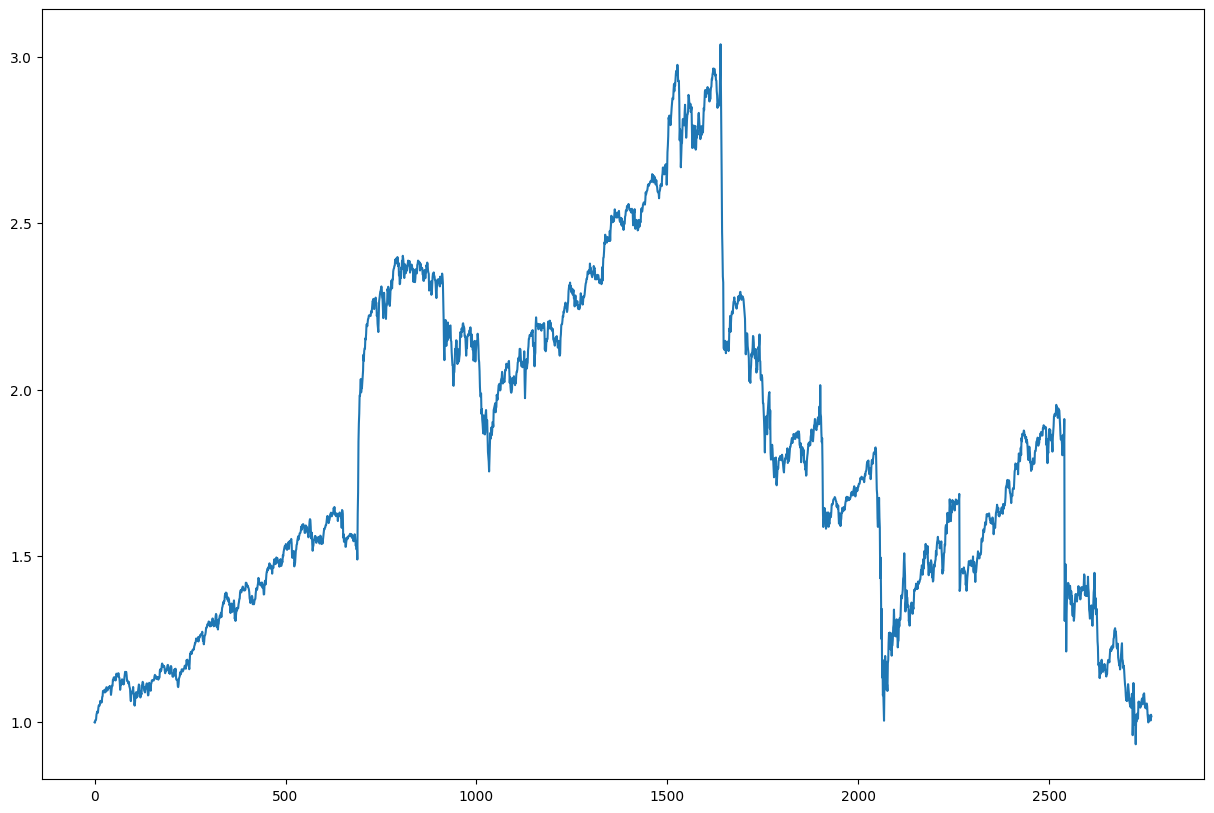

In [68]:
import matplotlib.pyplot as plt
plt.plot(np.cumprod((_returns.to_numpy()*weights_rolling).sum(axis=1)))

In [24]:
weights_rolling[1640:1650]

array([[ 2.22686679e-02,  1.86738990e-03,  2.32843963e-03, ...,
         1.36089586e-03,  4.13633094e-04,  1.00652831e-03],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       ...,
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00],
       [-1.38704607e+01, -1.24457513e+00, -1.89758421e+00, ...,
        -3.59791382e+00, -1.85778240e+00, -4.63635141e+00]])

In [31]:
portfolio.data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2768, freq=None)

In [32]:
a_.shape

(1, 2768)

<AxesSubplot: xlabel='Date'>

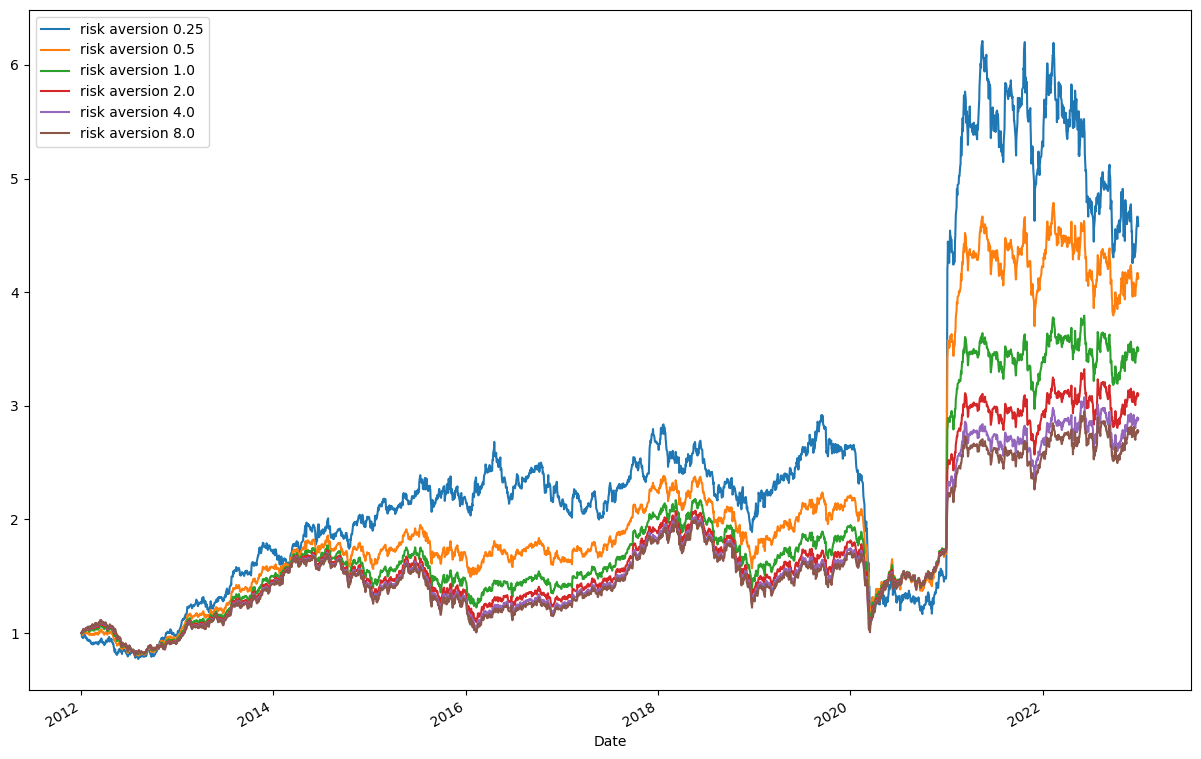

In [54]:
aversions = pd.concat(l, axis=1)
aversions.plot()

# Stock clustering

In [40]:
portfolio.data.shape

(2768, 470)

In [23]:
#Correlation matrix cleaning
from utils import compute_clean_correlation_matrix
cov = returns.cov().to_numpy()

clean_corr = compute_clean_correlation_matrix(cov, 470, 2768)

<AxesSubplot: >

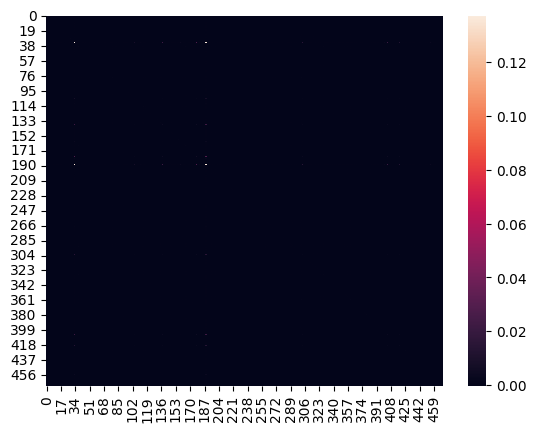

In [24]:
import seaborn as sns 


sns.heatmap(cov)

<AxesSubplot: ylabel='Frequency'>

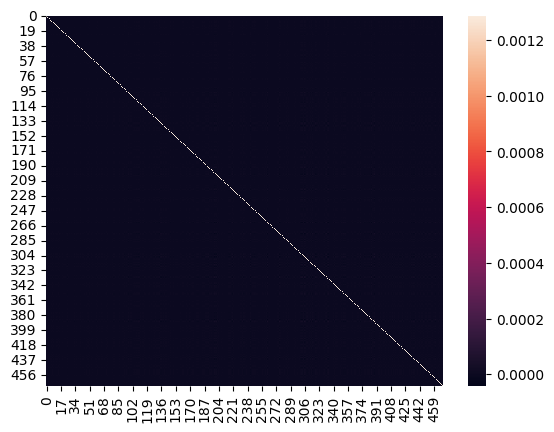

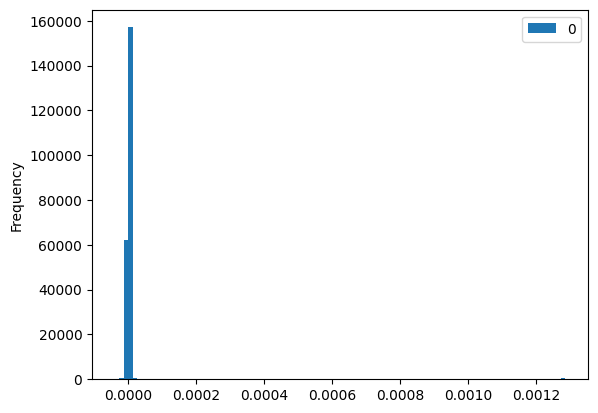

In [30]:
sns.heatmap(clean_corr)
pd.DataFrame(clean_corr.reshape(-1, 1)).plot(kind="hist", bins=100)

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
from networkx.algorithms import community

def LouvainCorrelationClustering(C_s, resolution): 

    mygraph = nx.from_numpy_array(np.abs(C_s))
    partitions = community.louvain_communities(mygraph, resolution=resolution)

    
    return partitions


In [5]:
from utils import compute_clean_correlation_matrix
import numpy as np
import seaborn as sns
from tqdm import tqdm
from itertools import repeat
from sklearn.metrics import adjusted_rand_score

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()
print(np.corrcoef(returns.T))
corr = np.nan_to_num(np.corrcoef(returns.T))
clean_corr = compute_clean_correlation_matrix(corr, 470, 2768)

risk_aversion=2
l = []
def do_it(subset):
    
    print(clean_corr.shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], clean_corr[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)

resol = []
#
#for res in tqdm([0.95, 1, 1.1, 1.25, 1.5], position=0, leave=False):
s = []
for i in tqdm(range(207, len(returns)-10, 10), position=0, leave=False): 

    r = returns[i-207:i]
    is_var = r.std(axis=0) > 0.0
    corr = np.corrcoef(r.T)[is_var, :][:, is_var]
    #corr[np.isnan(corr)] = 0.0
    np.fill_diagonal(corr, 1)

    clean_corr = np.zeros((returns.shape[1], returns.shape[1]))
    a = compute_clean_correlation_matrix(corr, corr.shape[1], r.shape[0])
    j = 0
    if  (1 - is_var).sum():
        for i in range(len(clean_corr)):
            if is_var[i]:
                clean_corr[i, is_var] = a[j, :]
                j = j + 1
        np.fill_diagonal(clean_corr, 1)
    else:
        clean_corr = a
    clustering = LouvainCorrelationClustering(clean_corr, resolution=1)

    s.append(clustering)

    #ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

clusterings = []    
for clustering in tqdm(s):
    c_ = [list(zip(set_of_elem, repeat(_, len(set_of_elem)))) for _, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)



p = np.mean([adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])])
resol.append(p)

    #op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
    #a = pd.DataFrame( np.cumprod((ts+1)@op), index=portfolio.data.index, columns=[f"louvain_{i}"])
    #l.append(a)

    #a.plot()
    
    

[[1.         0.31583765 0.30179995 ... 0.4775061  0.42918408 0.51653781]
 [0.31583765 1.         0.28096201 ... 0.28895471 0.44728862 0.24562449]
 [0.30179995 0.28096201 1.         ... 0.29043806 0.3524787  0.30485818]
 ...
 [0.4775061  0.28895471 0.29043806 ... 1.         0.38273594 0.40665399]
 [0.42918408 0.44728862 0.3524787  ... 0.38273594 1.         0.28892566]
 [0.51653781 0.24562449 0.30485818 ... 0.40665399 0.28892566 1.        ]]


100%|██████████████████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 8258.85it/s]


In [48]:
list(map(len, s))

[32,
 34,
 33,
 35,
 33,
 32,
 30,
 29,
 30,
 32,
 30,
 30,
 28,
 29,
 27,
 26,
 27,
 26,
 27,
 26,
 26,
 24,
 27,
 26,
 27,
 28,
 28,
 27,
 27,
 25,
 24,
 24,
 26,
 25,
 25,
 25,
 23,
 21,
 23,
 22,
 23,
 21,
 24,
 20,
 22,
 18,
 20,
 20,
 16,
 17,
 17,
 17,
 17,
 15,
 17,
 15,
 15,
 16,
 16,
 17,
 16,
 14,
 13,
 13,
 14,
 13,
 14,
 12,
 13,
 10,
 10,
 10,
 11,
 12,
 12,
 10,
 11,
 10,
 8,
 9,
 9,
 11,
 10,
 9,
 9,
 11,
 9,
 10,
 9,
 10,
 11,
 10,
 11,
 9,
 9,
 10,
 9,
 9,
 9,
 11,
 9,
 10,
 6,
 8,
 6,
 8,
 6,
 8,
 6,
 8,
 7,
 6,
 7,
 5,
 6,
 4,
 3,
 3,
 3,
 4,
 5,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 5,
 4,
 4,
 3,
 4,
 4,
 5,
 6,
 5,
 4,
 4,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 5,
 4,
 4,
 3,
 3,
 4,
 3,
 5,
 5,
 4,
 4,
 3,
 4,
 4,
 5,
 3,
 5,
 4,
 4,
 3,
 3,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 5,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 5,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,

In [39]:
resol

[0.22000593656357906,
 0.23399951358396948,
 0.2227151889743164,
 0.17720147759948082,
 0.1363102465555856]

Text(0.5, 1.0, 'In between time steps ARI')

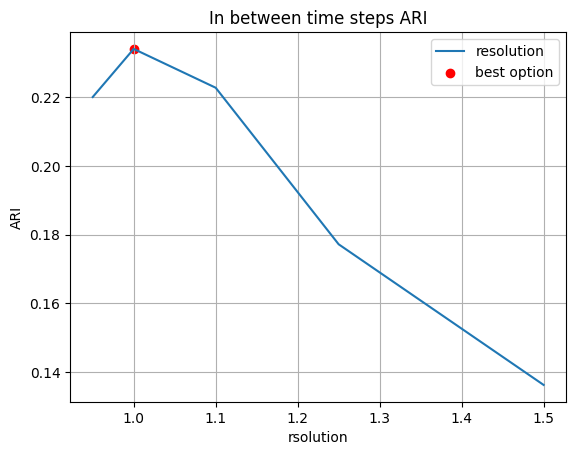

In [42]:

plt.plot([0.95, 1, 1.1, 1.25, 1.5], resol, label="resolution")
plt.scatter(1.0, 0.234, label="best option", color="red")
plt.grid()
plt.xlabel("resolution")
plt.ylabel("ARI")
plt.legend()
plt.title("In between time steps ARI with correlation")

100%|██████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1012.58it/s]


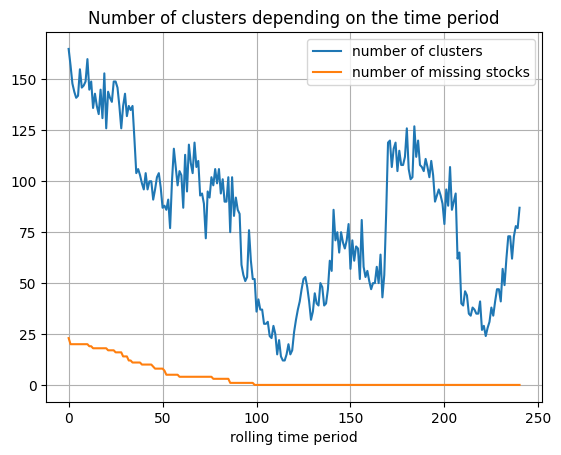

In [16]:
import matplotlib.pyplot as plt

#[0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1., 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]
number_of_missing_stocks = []
for i in tqdm(range(367, len(returns), 10)): 
    r = returns[i-367:i]
    is_var = r.std(axis=0) > 0.0 
    number_of_missing_stocks.append((1-is_var).sum())
plt.plot(bro, label="number of clusters")
plt.plot(number_of_missing_stocks, label="number of missing stocks")
plt.xlabel("rolling time period")
#plt.ylabel("number of clusters")
plt.title("Number of clusters depending on the time period")
plt.legend()
plt.grid()

100%|██████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 1004.04it/s]


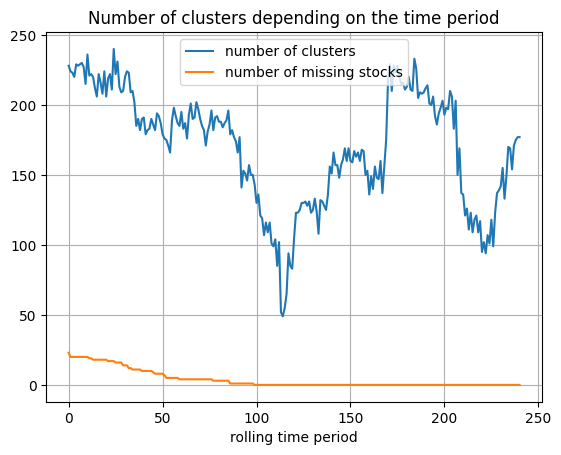

In [13]:
import matplotlib.pyplot as plt

#[0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1., 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]
number_of_missing_stocks = []
for i in tqdm(range(367, len(returns), 10)): 
    r = returns[i-367:i]
    is_var = r.std(axis=0) > 0.0 
    number_of_missing_stocks.append((1-is_var).sum())
plt.plot(bro, label="number of clusters")
plt.plot(number_of_missing_stocks, label="number of missing stocks")
plt.xlabel("rolling time period")
#plt.ylabel("number of clusters")
plt.title("Number of clusters depending on the time period")
plt.legend()
plt.grid()


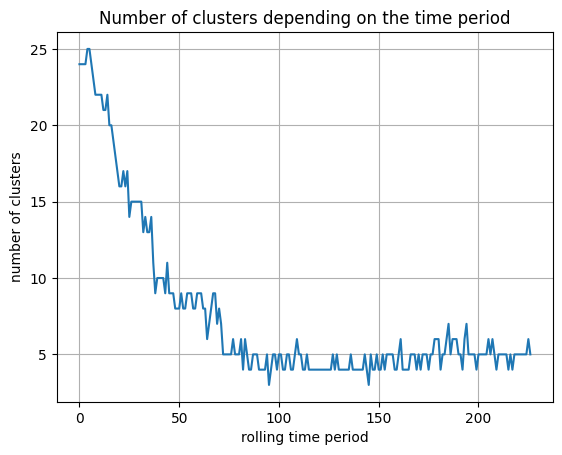

In [34]:
import matplotlib.pyplot as plt

#[0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1., 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]
plt.plot(bro)
plt.xlabel("rolling time period")
plt.ylabel("number of clusters")
plt.title("Number of clusters depending on the time period")
plt.grid()


In [45]:
raw_corr

A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL       XOM  \
A     0.591114  0.545132  0.561943  ...  0.360416  0.294357  0.368391   
AAL   0.325953  0.253576  0.361275  ...  0.418142  0.111724  0.332560   
AAP   0.357023  0.284791  0.328964  ...  0.267787  0.284384  0.293480   
AAPL  0.513590  0.537360  0.541959  ...  0.343961  0.283735  0.316849   
ABBV  0.366265  0.317906  0.327527  ...  0.238229  0.259607  0.306612   
...        ...       ...       ...  ...       ...       ...       ...   
YUM   0.471999  0.389206  0.412971  ...  0.351327  0.330522  0.359951   
ZBH   0.501266  0.373748  0.440096  ...  0.410802  0.277761  0.431313   
ZBRA  0.481622  0.442631  0.496859  ...  0.357866  0.183153  0.325007   
ZION  0.464672  0.276203  0.448269  ...  0.430331  0.166130  0.521273   
ZTS   0.531574  0.481897  0.447072  ...  0.318651  0.339167  0.291924   

          XRAY       XYL       YUM       ZBH      ZBRA      ZION       ZTS  
A     0.416116  0.546470  0.412449  0.466362  0.477506  0.429184  0.516538  
AAL   0.316203  0.390250  0.324927  0.373236  0.288955  0.447289  0.245624  
AAP   0.301757  0.380888  0.338043  0.308479  0.290438  0.352479  0.304858  
AAPL  0.311147  0.417349  0.360114  0.372625  0.443271  0.323107  0.440490  
ABBV  0.329207  0.316338  0.267065  0.366414  0.272323  0.277427  0.415290  
...        ...       ...       ...       ...       ...       ...       ...  
YUM   0.349310  0.440355  1.000000  0.416501  0.336970  0.373123  0.395438  
ZBH   0.499469  0.450446  0.416501  1.000000  0.353175  0.442394  0.411619  
ZBRA  0.276421  0.437716  0.336970  0.353175  1.000000  0.382736  0.406654  
ZION  0.441984  0.513841  0.373123  0.442394  0.382736  1.000000  0.288926  
ZTS   0.369624  0.433002  0.395438  0.411619  0.406654  0.288926  1.000000  

[470 rows x 470 columns]

In [46]:
from tqdm import tqdm
clustering = LouvainCorrelationClustering(raw_corr.to_numpy())

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()

raw_corr, clean_corr = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill"))

def do_it(subset):
    
    print(raw_corr.to_numpy().shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], raw_corr.to_numpy()[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)



ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

ts.shape
            
    

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL    

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 267.04it/s]

(470, 470)
(5, 1) (5, 5)
[[1.32751794]]
[[-0.99937106]]
-0.7528117187707172
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(137, 1) (137, 137)
[[3.97481527]]
[[-1.0002646]]
-0.2516505875147185
weights shape is  (137, 1) and retruns shape is (2768, 470)
(470, 470)
(2, 1) (2, 2)
[[1.30883985]]
[[-1.00015168]]
-0.7641513051344485
weights shape is  (2, 1) and retruns shape is (2768, 470)
(470, 470)
(34, 1) (34, 34)
[[2.29326724]]
[[-0.99951856]]
-0.4358491431165218
weights shape is  (34, 1) and retruns shape is (2768, 470)
(470, 470)
(26, 1) (26, 26)
[[2.70510238]]
[[-0.99934522]]
-0.3694297223641189
weights shape is  (26, 1) and retruns shape is (2768, 470)
(470, 470)
(112, 1) (112, 112)
[[9.40075173]]
[[-1.06641864]]
-0.11343972001173754
weights shape is  (112, 1) and retruns shape is (2768, 470)
(470, 470)
(21, 1) (21, 21)
[[2.62533405]]
[[-0.99960157]]
-0.38075214493959414
weights shape is  (21, 1) and retruns shape is (2768, 470)
(470, 470)
(121, 1) (121, 121)
[[

(2768, 12)

(12, 1) (12, 12)
[[2.46653483]]
[[-1.00509802]]
-0.4074939494810485


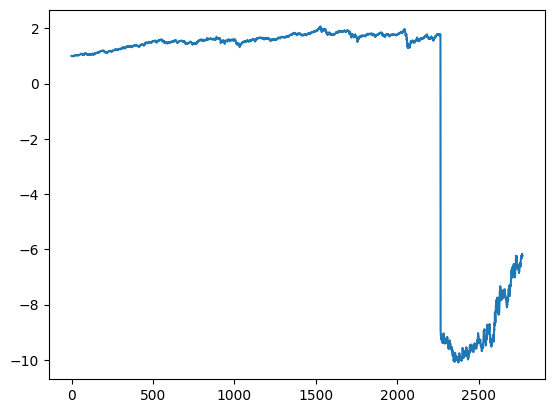

In [47]:


#raw_corr, _ = compute_clean_correlation_matrix(ts)

op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
a = np.cumprod((ts+1)@op)

plt.plot(a)


In [72]:
from tqdm import tqdm

risk_aversion=1

raw_corr, clean_corr = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill"))

clean_corr = np.array(clean_corr)

clustering = LouvainCorrelationClustering(clean_corr)

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0).to_numpy()



def do_it(subset):
    
    print(clean_corr.shape)
    r = returns[:, subset]
    op = optimal_weights(r.mean(axis=0)[:, np.newaxis], clean_corr[subset, :][:, subset])
    print("weights shape is ", op.shape, "and retruns shape is", returns.shape)

    a = (r@op)
    op.shape
    
    return np.array(a)



ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

ts.shape
            

             A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
A     1.000000  0.315838  0.301800  0.473025  0.377988  0.355773  0.572527   
AAL   0.315838  1.000000  0.280962  0.278760  0.183494  0.241095  0.240254   
AAP   0.301800  0.280962  1.000000  0.270812  0.261516  0.285977  0.301845   
AAPL  0.473025  0.278760  0.270812  1.000000  0.274750  0.286929  0.437295   
ABBV  0.377988  0.183494  0.261516  0.274750  1.000000  0.385237  0.444365   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.412449  0.324927  0.338043  0.360114  0.267065  0.288937  0.381604   
ZBH   0.466362  0.373236  0.308479  0.372625  0.366414  0.351922  0.472219   
ZBRA  0.477506  0.288955  0.290438  0.443271  0.272323  0.272415  0.399558   
ZION  0.429184  0.447289  0.352479  0.323107  0.277427  0.339166  0.344549   
ZTS   0.516538  0.245624  0.304858  0.440490  0.415290  0.361821  0.547980   

           ACN      ADBE       ADI  ...      WYNN       XEL    


100%|███████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<00:00, 724.96it/s]

(470, 470)
(2, 1) (2, 2)
[[3.81563372]]
[[-1.00156346]]
-0.2624894152868587
weights shape is  (2, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99946221]]
-0.999462209899197
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99928427]]
-0.9992842680911869
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99957468]]
-0.9995746754773028
weights shape is  (1, 1) and retruns shape is (2768, 470)
(470, 470)
(5, 1) (5, 5)
[[-45.48904967]]
[[-1.01585932]]
0.022331953033681212
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(5, 1) (5, 5)
[[10.52113943]]
[[-0.9970766]]
-0.09476888034253757
weights shape is  (5, 1) and retruns shape is (2768, 470)
(470, 470)
(41, 1) (41, 41)
[[29.19630898]]
[[-0.99450873]]
-0.03406282380823938
weights shape is  (41, 1) and retruns shape is (2768, 470)
(470, 470)
(1, 1) (1, 1)
[[1.]]
[[-0.99974247]]
-0.999742470875227
weights sh

(2768, 131)

(11, 1) (11, 11)
[[3.18809266]]
[[-0.99868754]]
-0.31325549380357015


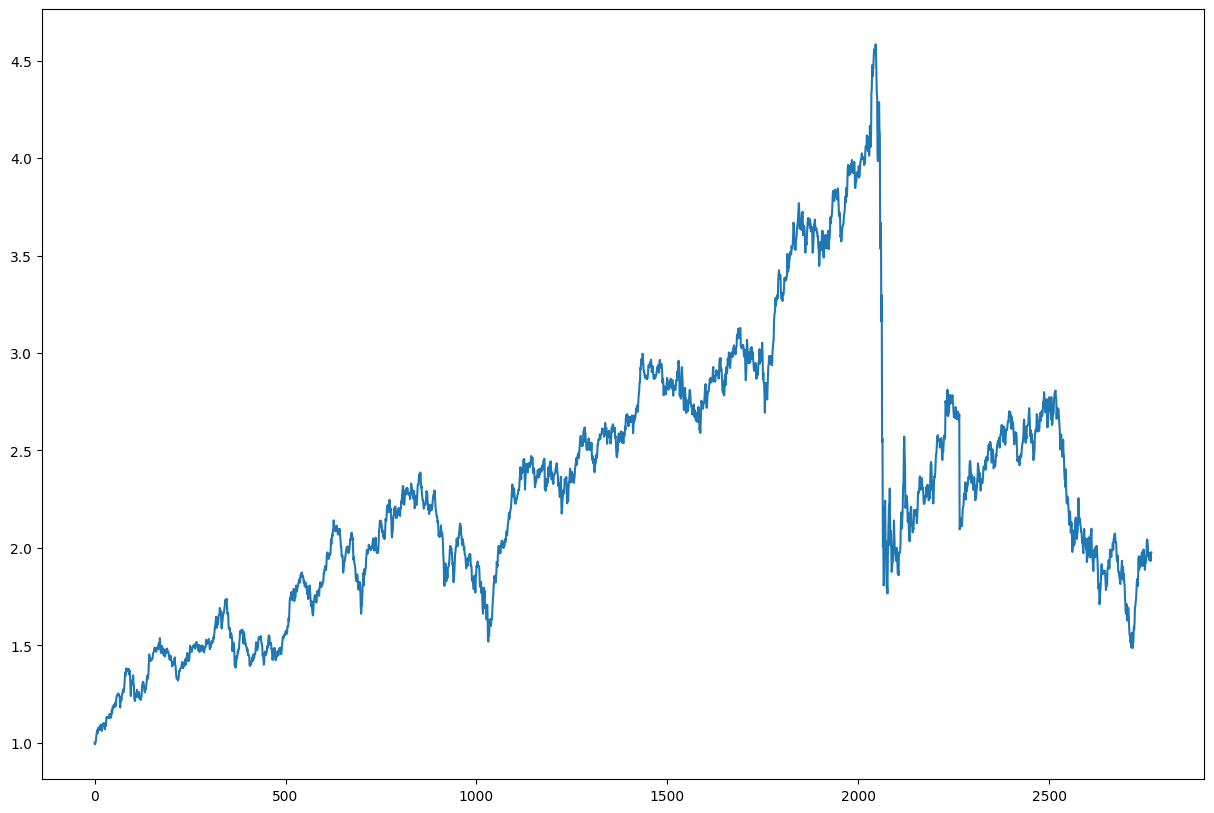

In [70]:

op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
a = np.cumprod((ts+1)@op)

plt.plot(a)

In [35]:
a = pd.read_csv("data/us-stocks.csv")
a = a.dropna(axis=0, thresh=int(0.1*a.shape[1])).dropna(axis=1, thresh=int(0.1*a.shape[0]))
a

Unnamed: 0    ^GSPC     GE     IBM    DIS      BA    CAT     AA    HPQ  \
8340         8341   151.19   0.88   13.08   1.12    2.95   2.66   2.00   2.88   
8341         8342   150.66   0.88   13.00   1.14    2.98   2.70   1.96   2.85   
8342         8343   152.81   0.91   13.26   1.15    3.07   2.88   2.00   2.89   
8343         8344   153.37   0.90   13.28   1.16    3.07   2.88   2.02   2.87   
8344         8345   152.67   0.90   13.26   1.17    3.16   2.88   1.97   2.83   
...           ...      ...    ...     ...    ...     ...    ...    ...    ...   
16286       16287  1868.20  25.76  186.22  81.38  124.43  96.82  12.17  29.59   
16287       16288  1846.34  25.34  183.90  79.93  121.89  95.61  11.86  28.91   
16288       16289  1841.13  25.11  182.21  80.07  123.11  95.39  11.84  29.07   
16289       16290  1858.83  25.43  185.81  81.39  125.42  95.67  11.90  29.48   
16290       16291  1872.25  25.65  186.81  81.99  124.04  96.41  12.00  30.56   

          DD  ...    SGR    LIZ  DT   ABK  ID    CAE   TKS  BMT     AG     TBL  
8340    2.15  ...    NaN    NaN NaN   NaN NaN    NaN   NaN  NaN    NaN     NaN  
8341    2.16  ...    NaN    NaN NaN   NaN NaN    NaN   NaN  NaN    NaN     NaN  
8342    2.21  ...    NaN    NaN NaN   NaN NaN    NaN   NaN  NaN    NaN     NaN  
8343    2.22  ...    NaN    NaN NaN   NaN NaN    NaN   NaN  NaN    NaN     NaN  
8344    2.19  ...    NaN    NaN NaN   NaN NaN    NaN   NaN  NaN    NaN     NaN  
...      ...  ...    ...    ...  ..   ...  ..    ...   ...  ...    ...     ...  
16286  66.43  ...  355.0  27.68 NaN  0.41 NaN  13.59  5.91  NaN  11.14  8000.0  
16287  65.71  ...  355.0  27.50 NaN  0.42 NaN  13.48  6.00  NaN  11.50  8000.0  
16288  65.77  ...  355.0  26.88 NaN   NaN NaN  13.38  6.04  NaN  11.53  8000.0  
16289  66.38  ...  370.0  27.05 NaN  0.42 NaN  13.35  6.08  NaN  11.16  8000.0  
16290  66.80  ...  375.0  27.75 NaN  0.43 NaN  13.53  6.13  NaN  11.31  8000.0  

[7816 rows x 1017 columns]

In [27]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903


In [59]:
data =  ((portfolio.data.diff()/portfolio.data)).fillna(0)

In [64]:
for time_period in tqdm(np.split(data.to_numpy(), np.arange(100, data.shape[0], 100))):
    
    dtw.distance_matrix(time_period.T, only_triu=True, use_c=True, parallel=True, show_progress=True)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:27<00:00,  1.03it/s]


In [17]:
from dtaidistance import dtw

da
ds = dtw.distance_matrix(data.to_numpy().T, only_triu=True, use_c=True, parallel=True, show_progress=True)
ds

array([[       inf, 1.13333583, 0.76874758, ..., 0.83835698, 0.70454819,
        0.58087342],
       [       inf,        inf, 1.16879652, ..., 1.17818988, 1.08183983,
        1.1547224 ],
       [       inf,        inf,        inf, ..., 0.8307227 , 0.84438631,
        0.74408932],
       ...,
       [       inf,        inf,        inf, ...,        inf, 0.88736917,
        0.81170198],
       [       inf,        inf,        inf, ...,        inf,        inf,
        0.73102395],
       [       inf,        inf,        inf, ...,        inf,        inf,
               inf]])

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False]])

array([[0.        , 1.13333583, 0.76874758, ..., 0.83835698, 0.70454819,
        0.58087342],
       [1.13333583, 0.        , 1.16879652, ..., 1.17818988, 1.08183983,
        1.1547224 ],
       [0.76874758, 1.16879652, 0.        , ..., 0.8307227 , 0.84438631,
        0.74408932],
       ...,
       [0.83835698, 1.17818988, 0.8307227 , ..., 0.        , 0.88736917,
        0.81170198],
       [0.70454819, 1.08183983, 0.84438631, ..., 0.88736917, 0.        ,
        0.73102395],
       [0.58087342, 1.1547224 , 0.74408932, ..., 0.81170198, 0.73102395,
        0.        ]])

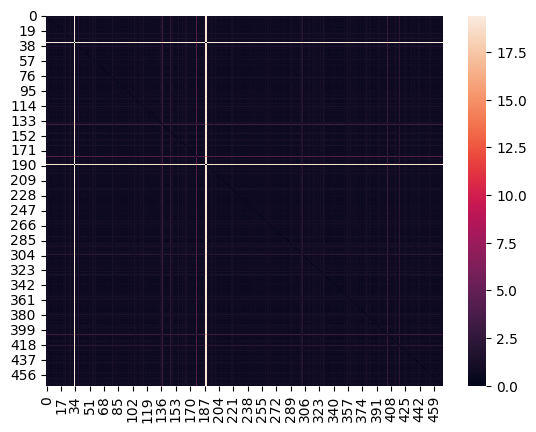

In [24]:
import numpy as np
import seaborn as sns

np.fill_diagonal(ds, 0)
ds[ds == np.inf] = 0
ds_ = np.copy(ds)
ds_ = ds_ + ds_.T
sns.heatmap(ds_)
ds_

<AxesSubplot: xlabel='Date'>

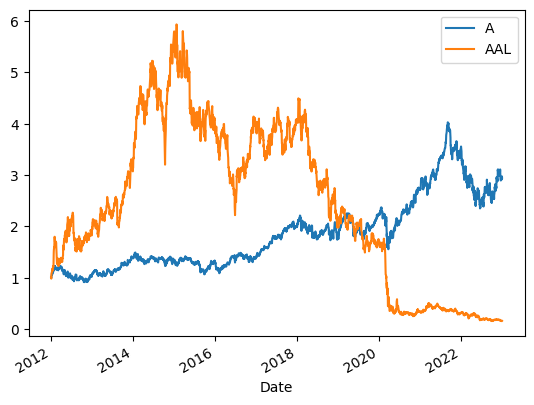

In [57]:
_returns.iloc[:, 0:2].cumprod().plot()

<AxesSubplot: ylabel='Frequency'>

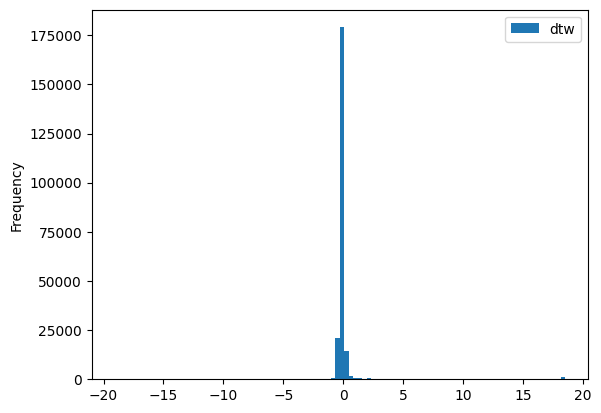

In [28]:
import pandas as pd

w = (ds_ - ds_.mean(axis=1)).reshape(-1)
pd.DataFrame(w, columns=["dtw"]).plot(kind="hist", bins=100)

In [37]:
dist_2_sim = 1/ds_
np.fill_diagonal(dist_2_sim, 0)

C:\Users\user\AppData\Local\Temp\ipykernel_10960\1508931032.py:1: RuntimeWarning: divide by zero encountered in divide
  dist_2_sim = 1/ds_


<AxesSubplot: ylabel='Frequency'>

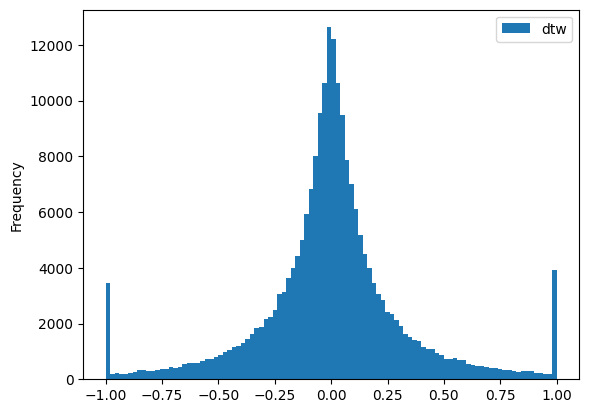

In [41]:
pd.DataFrame(clean_corr.reshape(-1), columns=["dtw"]).plot(kind="hist", bins=100)

<AxesSubplot: ylabel='Frequency'>

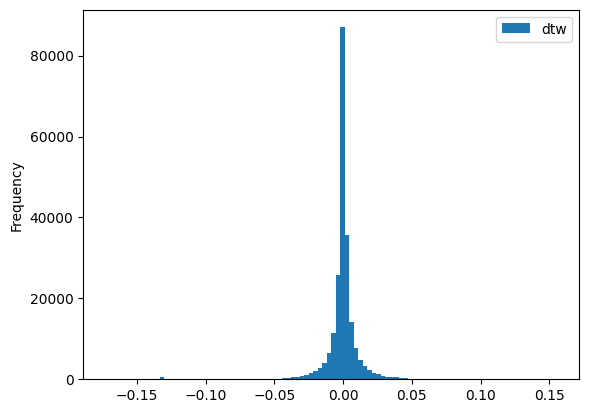

In [54]:
signed_dtw = (dist_2_sim - dist_2_sim.mean())/np.max(np.abs(dist_2_sim)) * (clean_corr)
pd.DataFrame(signed_dtw.reshape(-1), columns=["dtw"]).plot(kind="hist", bins=100)

0.11697467009189476


array([[ 4.59435799e-03],
       [ 2.79476874e-03],
       [ 4.12328933e-02],
       [ 7.22508239e-03],
       [-3.63122918e-03],
       [-4.79048754e-03],
       [-2.24630332e-02],
       [ 2.51992950e-03],
       [ 3.16927794e-03],
       [ 9.68257445e-03],
       [-3.67556927e-03],
       [ 9.68557518e-04],
       [-2.82094305e-03],
       [-7.86072631e-03],
       [-1.21858059e-02],
       [ 4.23790115e-04],
       [ 1.58536674e-02],
       [ 8.85088862e-03],
       [-2.87529858e-02],
       [ 6.10841780e-03],
       [-2.56206988e-02],
       [-1.68887496e-03],
       [ 1.29223235e-02],
       [-9.37880797e-03],
       [ 6.11843351e-03],
       [-1.93535586e-03],
       [-3.22568951e-03],
       [ 4.75833306e-03],
       [ 1.56831879e-02],
       [ 1.42503989e-02],
       [ 1.84622564e-03],
       [ 7.50170696e-03],
       [-8.56009410e-03],
       [ 2.29184245e-02],
       [-5.46438979e-03],
       [-1.04076324e-02],
       [-3.68935260e-03],
       [ 1.26663538e-02],
       [ 9.0

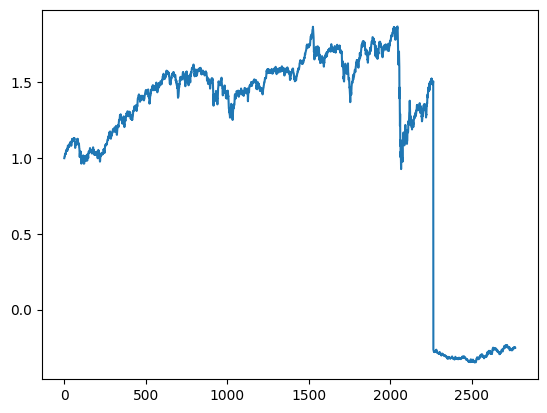

In [55]:
import matplotlib.pyplot as plt

returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
print(returns.mean(axis=0).sum())
op = optimal_weights(returns.mean(axis=0).to_numpy()[:, np.newaxis], signed_dtw)
_returns = ((portfolio.data.diff()/portfolio.data) + 1).fillna(1)
a_ = np.cumprod((_returns.to_numpy()@op))

plt.plot(a_)
op

In [2]:
from utils import compute_clean_correlation_matrix
import numpy as np
from tqdm import tqdm
from dtaidistance import dtw, clustering
from sklearn.metrics import silhouette_score

#clean_corr = compute_clean_correlation_matrix(returns.corr().fillna(0))
#returns = returns

l_ = []
lengths = list(map(len, l))
returns = ((portfolio.data.diff()/portfolio.data)).fillna(0)
for i, time_period in enumerate(tqdm(np.split(returns.to_numpy(), np.arange(200, returns.shape[0], 10)))):
    
    #ds = dtw.distance_matrix(time_period.T, only_triu=True, use_c=True, parallel=True, show_progress=True)
    
    m = clustering.kmeans.KMeans(lengths[i])
    r = m.fit_fast(time_period.T)
    print(list(map(len, r[0].values())))
    continue
    is_var = time_period.std(axis=0) > 0.0
    ds = dtw.distance_matrix(time_period[:, is_var].T, only_triu=True, use_c=True, parallel=True, show_progress=True)
    np.fill_diagonal(ds, 1)
    ds[ds == np.inf] = 0
    #ds_ = np.copy(ds)
    ds = ds + ds.T
    ds = 1/ds
    np.fill_diagonal(ds, 0)
    #np.corrcoef(.T)[is_var, :][:, is_var]
    #corr[np.isnan(corr)] = 0.0
    
    clean_corr = np.zeros((returns.shape[1], returns.shape[1]))
    a = ds
    j = 0
    if  (1 - is_var).sum():
        for i in range(len(clean_corr)):
            if is_var[i]:
                clean_corr[i, is_var] = a[j, :]
                j = j + 1
        np.fill_diagonal(clean_corr, 1)
    else:
        clean_corr = a
    #c = compute_clean_correlation_matrix(portfolio.data.fillna(method="bfill").corr().to_numpy(), 470, 2768)
    #c = np.array(c)
    #ds = dtw.distance_matrix(data.to_numpy().T, only_triu=True, use_c=True, parallel=True, show_progress=True)
   
    fa = LouvainCorrelationClustering(clean_corr, resolution=1)
    print(len(fa))
    l.append(fa)
    #ts = np.concatenate([do_it(list(subset)) for subset in tqdm(clustering)], axis=1)

    #ts.shape

    #op = optimal_weights(ts.mean(axis=0)[:, np.newaxis], np.corrcoef(ts.T))
    #a = pd.DataFrame( np.cumprod((ts+1)@op), index=portfolio.data.index, columns=[f"louvain_{i}"])
    #l.append(a)

    #a.plot()


    

NameError: name 'l' is not defined

In [30]:
l

[[{4},
  {25},
  {33},
  {72},
  {79},
  {81},
  {84},
  {111},
  {114},
  {117},
  {132},
  {159},
  {179},
  {180},
  {184},
  {206},
  {209},
  {216},
  {228},
  {229},
  {244},
  {245},
  {269},
  {296},
  {306},
  {323},
  {324},
  {332},
  {334},
  {362},
  {364},
  {384},
  {402},
  {5,
   6,
   9,
   11,
   13,
   14,
   15,
   19,
   24,
   27,
   30,
   32,
   35,
   38,
   41,
   42,
   44,
   47,
   48,
   49,
   50,
   52,
   55,
   57,
   63,
   64,
   65,
   68,
   70,
   71,
   74,
   75,
   77,
   85,
   89,
   90,
   91,
   93,
   94,
   97,
   99,
   102,
   103,
   104,
   105,
   110,
   115,
   116,
   118,
   123,
   124,
   126,
   127,
   129,
   135,
   136,
   137,
   143,
   144,
   145,
   146,
   154,
   155,
   156,
   158,
   160,
   162,
   165,
   167,
   172,
   174,
   175,
   181,
   182,
   185,
   186,
   188,
   189,
   193,
   202,
   211,
   212,
   214,
   217,
   219,
   221,
   224,
   232,
   233,
   237,
   238,
   239,
   242,
   246,
   

In [44]:
returns = portfolio.returns
c = compute_clean_correlation_matrix(returns.corr().fillna(0).to_numpy(), returns.shape[1],  returns.shape[0])
c = np.array(c)
np.fill_diagonal(c, 0)
c = np.array(c)
print(c)
print(len(LouvainCorrelationClustering(c, 1)))

[[ 0.          0.04199558 -0.78237647 ... -0.54491832 -0.25893543
  -0.0626062 ]
 [ 0.04199558  0.         -0.08704632 ... -0.03499045 -0.0243285
   0.04687814]
 [-0.78237647 -0.08704632  0.         ...  0.89084554  0.39842716
  -0.00870567]
 ...
 [-0.54491832 -0.03499045  0.89084554 ...  0.          0.32385729
   0.02385482]
 [-0.25893543 -0.0243285   0.39842716 ...  0.32385729  0.
  -0.08833983]
 [-0.0626062   0.04687814 -0.00870567 ...  0.02385482 -0.08833983
   0.        ]]
470


<AxesSubplot: ylabel='Frequency'>

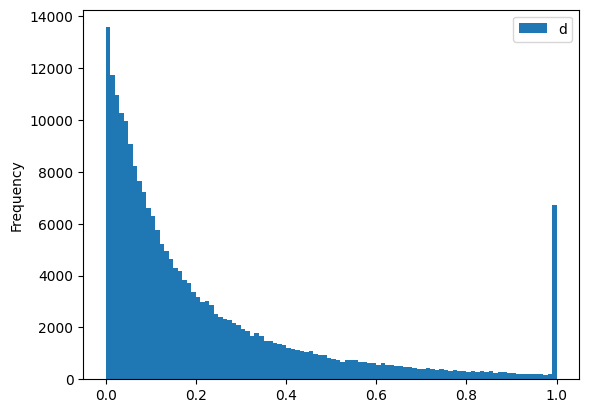

In [46]:
pd.DataFrame(np.abs(c).reshape(-1, 1), columns=["d"]).plot(kind="hist", bins=100)

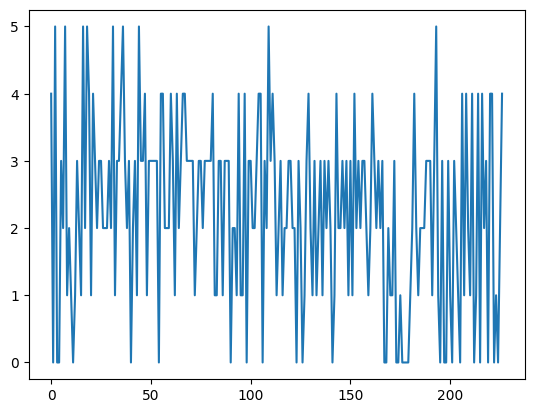

In [28]:
plt.plot([c[0] for c in clusterings])

100%|██████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 3649.91it/s]


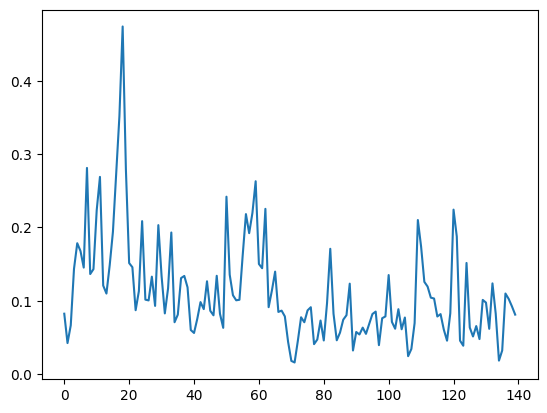

In [14]:
from sklearn.metrics import adjusted_rand_score
from itertools import repeat

clusterings = []
for clustering in tqdm(s):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        



plt.plot([adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])])


100%|██████████████████████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 6973.25it/s]


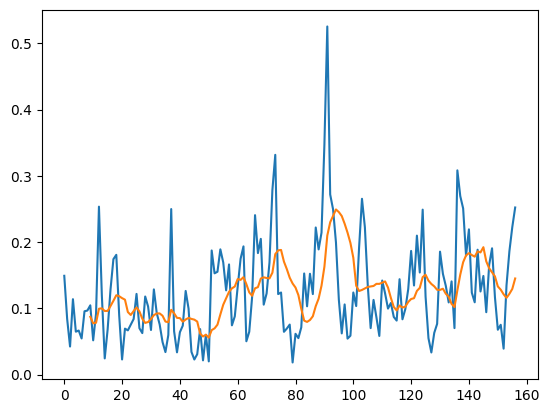

In [33]:
from sklearn.metrics import adjusted_rand_score
from itertools import repeat
import matplotlib.pyplot as plt

clusterings = []
for clustering in tqdm(l):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        

p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
plt.plot(p)
plt.plot(pd.DataFrame(p).rolling(10).mean())

100%|██████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 3839.79it/s]


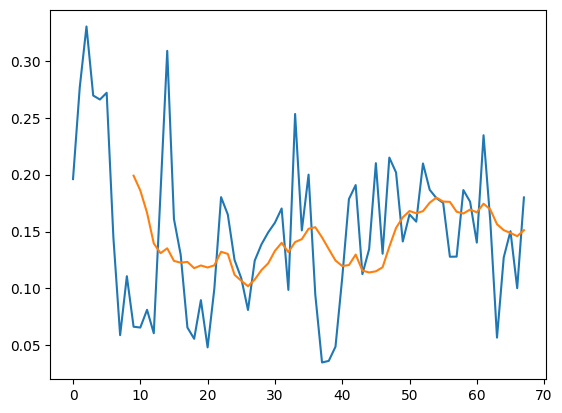

In [19]:
from itertools import repeat
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

clusterings = []
for clustering in tqdm(l):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        


p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
plt.plot(p)
plt.plot(pd.DataFrame(p).rolling(10).mean())

100%|██████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 8416.01it/s]


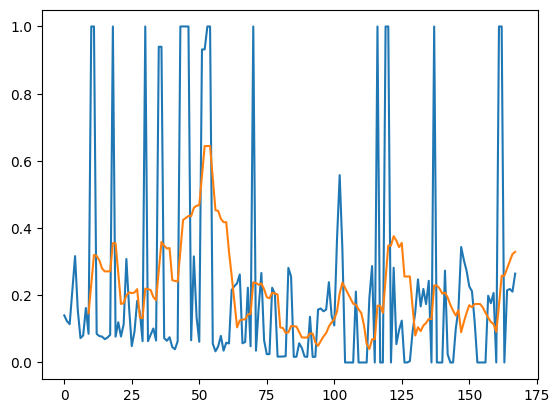

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

clusterings = []
for clustering in tqdm(l):
    c_ = [list(zip(set_of_elem, repeat(i, len(set_of_elem)))) for i, set_of_elem in enumerate(clustering)]
    c_ = list(map(lambda x: x[1], sorted([x for _ in c_ for x in _])))
    clusterings.append(c_)
        


p = [adjusted_rand_score(x, y) for x, y in zip(clusterings[100:-1], clusterings[101:])]
plt.plot(p)
plt.plot(pd.DataFrame(p).rolling(10).mean())

In [22]:
np.mean(p)

0.22273500199019827

In [34]:
np.mean(p)

0.12615887287868527